# Plot loss curve and show inference sentences

 - Pre-training
    - Emotion dialogue data (cleaning)
       - loss ... over fitting in early steps
       - inference(10 Epoch) ... valid data: most of sentences are similar and have many [数詞] [人名]
       - inference(30 Eposh) ... train data: not changing each emotion
    - OpenSubtitles 
       - loss ... validation loss is not stable
       - inference(13 Epoch) ... most of them have only one word (but short input and reference)
    - Twitter dataset
       - loss ... smooth curve (valid decrease, increase)
       - inference(5 Epoch) ... natural but simple and dull
 -  Fine-tuning
     - all loss curve ... over-fitting in early steps

     - Op_sub -> emo_dial (cleaning)
        - inference(13 Epoch -> 4 Epoch, 13 Epoch -> 2 Epoch) ... many repitition
     -  Twitter -> emo_dial (cleaning)
        - inference(5 Epoch -> 4 Epoch) ... more natural but many  [数詞] [人名]
     -  Twitter -> emo_dial (all) 
        - infenrence(5 Epoch -> 2 Epoch) ... more various but many  [数詞] [人名] but domain can't  be decided
     -  Twitter -> emo_dial (all)  -> emo_dial (cleaning)
        - infenrence(5 Epoch -> 2 Epoch -> ) ... more various but many  [数詞] [人名]

In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [3]:
def plot_loss(log_path, MAX=-1,y_max=None):
    f = open(log_path, 'r')
    log_line = f.readlines()
    [print(log_line[i]) for i in range(20)]
    
    log_valid = [float(i.split(" ")[3].strip('\n')) for i in log_line if i.split(" ")[0] == "Valid"]
    log_train = [float(i.split(" ")[4].strip('\n')) for i in log_line if i.split(" ")[0] == "Train"]
    log_val = log_valid[1:MAX+1]
    min_val = min(log_val)
    [print("Minimize validation loss({}) : {} Epoch ".format(min_val, i+1)) 
           for i, l in enumerate(log_val) if l == min_val ]
    log_train = log_train[:MAX]
    x = np.arange(len(log_val))
    y1 = np.array(log_train)
    y2 = np.array(log_val)
    plt.plot(x,y1)
    plt.plot(x,y2)
    plt.show

In [1]:
log_path_cleaning = "../../emotion_dialogue_model/log/train20190206223204.log"
#log_path_all = "../../emotion_dialogue_model/log/train20190205141303.log" 

log_path_new_tw = "../../emotion_dialogue_model/log/train20190206121006.log" 
log_path_former_tw = "../../emotion_dialogue_model/log/train20190128001030.log" 

#pre-training former twitter
log_path_tw5_cl = "../../emotion_dialogue_model/log/train20190207000501.log"
log_path_tw3_all = "../../emotion_dialogue_model/log/train20190206220036.log"
log_path_tw83_all = "../../emotion_dialogue_model/log/train20190210090648.log" 
log_path_tw83_cl = "../../emotion_dialogue_model/log/train20190210091505.log"
log_path_tw5_all = "../../emotion_dialogue_model/log/train20190206225509.log" 
log_path_tw5_all10_cl = "../../emotion_dialogue_model/log/train20190208151444.log"
log_path_tw5_all20_cl = "../../emotion_dialogue_model/log/train20190207002610.log" 
log_path_tw5_all34_cl = "../../emotion_dialogue_model/log/train20190207012453.log" 
log_path_tw5_all40_cl = "../../emotion_dialogue_model/log/train20190207000624.log" 
log_path_tw5_all60_cl = "../../emotion_dialogue_model/log/train20190207004548.log"

#pre-training new twitter
log_path_tw98_all = "../../emotion_dialogue_model/log/train20190212180504.log"

log_path_former_op = "../../emotion_dialogue_model/log/train20190128001146.log"
log_path_op = "../../emotion_dialogue_model/log/train20190212173549.log"
log_path_op13_all = "../../emotion_dialogue_model/log/train20190208225526.log" 

# ☆　Only twitter
## former twitter (learning rate 1e-4)

Data directory: ../data/twitter_dial/extend

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/pre_twitter_0128

Use emotion: False

Checkpoint path: None

Pretrained: False

Fix embedding: False

inf_last: False

decoder_learning_ratio: 5.0

dropout: 0.1

PAD_id: 0

num_layers: 2

UNK_id: 3

MAX_UTTR_LEN: 100

max_gradient: 50.0

hidden_size: 256

lr_decay: 0.5773502691896258

teacher_forcing_ratio: 1.0

tfd_lambda: 0.4

max_epoch: 100

Minimize validation loss(5.8435) : 6 Epoch 


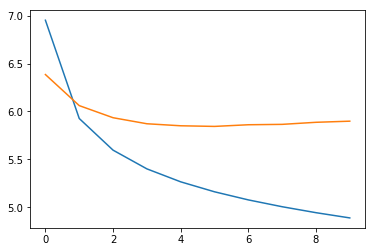

In [8]:
plot_loss(log_path_former_tw, 10)

In [6]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/pre_twitter_0128_4.mdl \
                    --data_dir ../../data/twitter_dial/splitted \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model\
                    --beam_width 5

Loading the test dataset...
Read 5000 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: あっそー、じゃあ待ってろ、ちゃんと起きろよ
tgt: ついてくんなよ。遊ぶんだろ
1[-2.28]: ごめん、ゲルハルト先生が呼んでるんだ 
2[-2.96]: ごめん、ゲルハルト先生が呼んでるんだ。 
3[-3.30]: ごめん、ゲルハルト先生が呼んでるんだ。後で 
4[-3.65]: どうしたんだ 
5[-3.95]: ねえ 

Dial 2:
src: しね
tgt: ちょっとだけ
1[-1.10]: しね 
2[-2.91]: うるせだまれ 
3[-3.63]: 死ね 
4[-4.04]: うるせ 
5[-4.94]: しね死ね 

Dial 3:
src: うん... お金あれば買ってたけどね笑
tgt: 買うよ あったら買ってたもん笑
1[-5.14]: うん 
2[-5.62]: いい 
3[-6.28]: お金儲け 
4[-6.70]: お金があれば買うしかない 
5[-6.88]: お金があればお金請求するべき 

Dial 4:
src: 私は真面目に謝らないといけない。↓ 劇場版と放課後楽園委員会とカゲロウアクターズの皆さんに。。。
tgt: しぐちゃんどうしたと・ω・
1[-4.28]: 同じく 
2[-4.60]: わかる 
3[-5.68]: え 
4[-7.12]: あづにゃん 
5[-7.23]: あづ 

Dial 5:
src: ですよね...。 でも、あそこだけは、ゆずぽんコールゆずれません笑
tgt: 完全に同意です。あと、自分もJK卒業式当選したので参戦しますよ
1[-4.68]: そーなんですか 
2[-4.68]: ですよね 
3[-5.44]: ですよね笑 
4[-5.59]: うん 
5[-7.97]: コール経験者 

Dial 6:
src: 金を積めば伸びた
tgt: 全鳥して～～
1[-6.15]: 30秒超えた 
2[-6.30]: 30センチ 
3[-6.54]: 30秒 
4[-6.76]: 20秒 
5[-7.61]: 30秒くらい 

Dial 7:
src: なんて呼んだらいい
tgt: 

In [7]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/pre_twitter_0128_4.mdl \
                    --data_dir ../../data/twitter_dial/splitted \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model\
                    --beam_width 5

Loading the test dataset...
Read 5000 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: やりたいです
tgt: わぁい ́∀♪松パートお願いしたい←←
1[-3.53]: いいですよ 
2[-3.55]: やりたいです 
3[-3.62]: お願いします 
4[-4.19]: やったー 
5[-4.64]: いつでもやりたいです 

Dial 2:
src: こんばんはゞ やはり埼玉とは違います...。フレームはすべて同じという設定ですから。
tgt: こんばんは♪ そうですね 今日 所用で神奈川まで行って来ました。やはり、暖かかったです♪ ガンダムフレームって、どれも一緒なのですか
1[-3.77]: こんばんは 
2[-5.33]: こんばんは埼玉県在住ですか 
3[-5.56]: こんばんはお世話になっております 
4[-6.07]: こんばんは埼玉県在住なんですね 
5[-6.31]: 初めまして埼玉県在住なんですね 

Dial 3:
src: 営業車に自分の会社の名前が書いてないのをいいことに爆音でカーステレオ鳴らすものがかり。
tgt: 俺もよくベガスとかホルモン流してテンション上げながら訪問してるな。
1[-4.12]: おめでとうございます 
2[-4.31]: やめろ 
3[-4.62]: お大事になさってください 
4[-5.88]: お大事に 
5[-7.46]: お大事になさ 

Dial 4:
src: かわいい
tgt: 照れた
1[-2.83]: 可愛くない 
2[-3.37]: かわいい 
3[-4.27]: 可愛い 
4[-4.58]: どこが 
5[-5.17]: かわいくない 

Dial 5:
src: ありがとう⌒▽⌒ すごくは、ないかも笑
tgt: いやいやすごいからホントにおめでとうおめでとう
1[-3.45]: いえいえ 
2[-3.80]: ヾノ≧∀≦イエイエ 
3[-4.46]: いえいえ笑 
4[-4.66]: いいえ 
5[-5.11]: いえいえ笑笑 

Dial 6:
src: 今、7番ホールの前に着いた お腹空いた
tgt: 今そっち向かうねー♡
1[-3.15]: いってらっしゃ

## new twitter (learning rate 1e-5)

Data directory: ../data/twitter_dial/splitted

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/pre_twitter_0206

Use emotion: False

Checkpoint path: None

Pretrained: False

Fix embedding: False

UNK_id: 3

max_epoch: 300

decay_step: 600000

tfd_lambda: 0.4

learning_rate: 1e-05

hidden_size: 256

SOS_id: 1

inf_last: False

dropout: 0.1

max_gradient: 50.0

lr_decay: 0.5773502691896258

batch_size: 64

l2_pooling: False

Minimize validation loss(5.5899) : 98 Epoch 


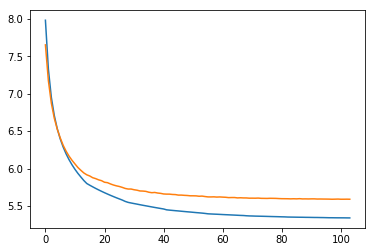

In [60]:
plot_loss(log_path_new_tw, 200)

In [143]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/pre_twitter_0206_10.mdl \
                    --data_dir ../../data/twitter_dial/splitted \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model

INFO:logger:Data directory: ../../data/twitter_dial/splitted
INFO:logger:Vocaburary file: ../../data/twitter_dial/vocab/spvocab.model
INFO:logger:Model: ../../emotion_dialogue_model/model/pre_twitter_0206_10.mdl
INFO:logger:Use emotion: False
INFO:logger:MAX_UTTR_LEN: 100
INFO:logger:PAD_id: 0
INFO:logger:learning_rate: 1e-05
INFO:logger:max_gradient: 50.0
INFO:logger:dropout: 0.1
INFO:logger:num_layers: 2
INFO:logger:UNK_id: 3
INFO:logger:tfd_lambda: 0.4
INFO:logger:len_alpha: 0.6
INFO:logger:suppress_lambda: 1.0
INFO:logger:teacher_forcing_ratio: 1.0
INFO:logger:SOS_id: 1
INFO:logger:decay_step: 600000
INFO:logger:decoder_learning_ratio: 5.0
INFO:logger:lr_decay: 0.5773502691896258
INFO:logger:eos_gamma: 0.05
INFO:logger:l2_pooling: False
INFO:logger:max_epoch: 300
INFO:logger:EOS_id: 2
INFO:logger:beam_width: 5
INFO:logger:use_emotion: False
INFO:logger:hidden_size: 256
INFO:logger:batch_size: 1
INFO:logger:inf_last: False
INFO:logger.dataset:Reading files...
INFO:logger.dataset:Rea

Loading the test dataset...
Read 5000 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 現時点で女の子の霊ってのは確定かな
tgt: 声が女の子だったからねw
1[-6.64]: それ 
2[-7.02]: あ 
3[-7.23]: あー 
4[-7.72]: あ、なるほど 
5[-8.69]: あそこ 

Dial 2:
src: 今度食ってみるわ
tgt: ハマるよ
1[-5.32]: うん 
2[-5.84]: え 
3[-6.00]: 今忙しいから話しかけんな 
4[-6.96]: おっぱい 
5[-7.06]: お 

Dial 3:
src: GUNDAM
tgt: ヾ ́༎ຶ ۝ ༎ຶノヾ ́༎ຶ ۝ ༎ຶノヾ ́༎ຶ ۝ ༎ຶノヾ ́༎ຶ ۝ ༎ຶノヾ ́༎ຶ ۝ ༎ຶノ
1[-5.56]: え 
2[-6.90]: お 
3[-6.99]: おk 
4[-7.00]: おっぱい 
5[-9.72]: え、 

Dial 4:
src: 誕生日おめでとう
tgt: ありがとー
1[-2.83]: ありがとう 
2[-3.28]: ありがと 
3[-3.36]: ありがとー 
4[-3.64]: おつあり 
5[-6.21]: ありがとう〜 

Dial 5:
src: タナトス★今日はやけに機嫌が良さそうだな。何かいいことでもあったのかい
tgt: うむ。昼の拝 ⁇ 、大儀である。
1[-2.07]: すまないが今は忙しいのだ。また後で返事をさせてもらう 
2[-2.19]: すまないが今は忙しいのだ。また後で返事をさせてもらうぜ 
3[-2.34]: すまないが今は忙しいのだ。また後で返事をさせてもらう... 
4[-2.35]: すまないが今は忙しいのだ。また後で返事をさせてもらうよ 
5[-2.35]: すまないが今は忙しいのだ。また後で返事をさせてもらうわ 

Dial 6:
src: あんまり絶頂に達してると脳にダメージくるなって思う。
tgt: じゃ、中途半端でいいо ́∀о
1[-5.80]: なるほど 
2[-7.54]: 確かに 
3[-7.65]: なるほどw 
4[-8.33]: なるほど... 
5[-8

In [8]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/pre_twitter_0206_45.mdl \
                    --data_dir ../../data/twitter_dial/splitted \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model

Loading the test dataset...
Read 5000 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: あっそー、じゃあ待ってろ、ちゃんと起きろよ
tgt: ついてくんなよ。遊ぶんだろ
1[-3.09]: ええ、その友達のためにも 
2[-3.17]: ......叫ばなくても聞こえるんだ 
3[-3.18]: ......大人しくしろ 
4[-3.27]: ええ 
5[-4.53]: へえ 

Dial 2:
src: しね
tgt: ちょっとだけ
1[-1.71]: しね 
2[-1.78]: うるせだまれ 
3[-4.23]: あほ 
4[-4.33]: え 
5[-5.28]: うるせ 

Dial 3:
src: うん... お金あれば買ってたけどね笑
tgt: 買うよ あったら買ってたもん笑
1[-5.54]: うんうん 
2[-5.60]: だよね 
3[-5.83]: うん 
4[-7.40]: お金貯まらない 
5[-7.94]: お金貯まったら買う 

Dial 4:
src: 私は真面目に謝らないといけない。↓ 劇場版と放課後楽園委員会とカゲロウアクターズの皆さんに。。。
tgt: しぐちゃんどうしたと・ω・
1[-6.76]: え 
2[-7.01]: えそうなの 
3[-7.91]: え、そうなの 
4[-8.30]: え、まじか 
5[-9.13]: え、なにそれ 

Dial 5:
src: ですよね...。 でも、あそこだけは、ゆずぽんコールゆずれません笑
tgt: 完全に同意です。あと、自分もJK卒業式当選したので参戦しますよ
1[-5.75]: ですよね 
2[-5.80]: そうなんですね 
3[-5.90]: そうなんですか 
4[-6.57]: ですよね笑 
5[-6.97]: そうなんですか笑 

Dial 6:
src: 金を積めば伸びた
tgt: 全鳥して～～
1[-5.85]: それ 
2[-6.96]: まてまてまて 
3[-7.13]: まてまてまてまてまて 
4[-7.96]: まて 
5[-8.63]: 1万 

Dial 7:
src: なんて呼んだらいい
tgt: かおんでいいよ好きなように なんて

In [61]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/pre_twitter_0206_98.mdl \
                    --data_dir ../../data/twitter_dial/splitted \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model

INFO:logger:Data directory: ../../data/twitter_dial/splitted
INFO:logger:Vocaburary file: ../../data/twitter_dial/vocab/spvocab.model
INFO:logger:Model: ../../emotion_dialogue_model/model/pre_twitter_0206_98.mdl
INFO:logger:Use emotion: False
INFO:logger:SOS_id: 1
INFO:logger:UNK_id: 3
INFO:logger:len_alpha: 0.6
INFO:logger:beam_width: 5
INFO:logger:decoder_learning_ratio: 5.0
INFO:logger:EOS_id: 2
INFO:logger:learning_rate: 1e-05
INFO:logger:dropout: 0.1
INFO:logger:num_layers: 2
INFO:logger:inf_last: False
INFO:logger:eos_gamma: 0.05
INFO:logger:batch_size: 1
INFO:logger:PAD_id: 0
INFO:logger:use_emotion: False
INFO:logger:max_epoch: 300
INFO:logger:decay_step: 600000
INFO:logger:suppress_lambda: 1.0
INFO:logger:lr_decay: 0.5773502691896258
INFO:logger:MAX_UTTR_LEN: 100
INFO:logger:max_gradient: 50.0
INFO:logger:l2_pooling: False
INFO:logger:tfd_lambda: 0.4
INFO:logger:teacher_forcing_ratio: 1.0
INFO:logger:hidden_size: 256
INFO:logger.dataset:Reading files...
INFO:logger.dataset:Rea

Loading the test dataset...
Read 5000 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 18日までは絶対聞けるよ
tgt: おお18日に聞けばいいのか
1[-4.59]: まじか 
2[-7.45]: 18日 
3[-7.46]: 11月 
4[-7.75]: 10月 
5[-7.88]: 11日 

Dial 2:
src: いやいや、みい人ですから大丈夫ですw 参戦するようであれば服やネイルでも緑取り入れれると思います•̀ᴗ•́
tgt: アドバイスたくさんありがとうございます︎参考にします
1[-5.40]: そうなんですね 
2[-5.97]: そうなんですか 
3[-7.70]: そうなんですね〜 
4[-8.12]: いやいや、そんなことないですよ 
5[-8.93]: いやいや、そんなことないですよ笑 

Dial 3:
src: ぴっぴー...乁 ̇ω ̇ 乁 悲しすぎるやろおおおお乁 ́ ̇ω ̇ 乁
tgt: ぴっぴっぴーー乁 ̇ ω ̇乁 これでぴっぴ聖人のかなしいお話は終わりです...次はマルさんがぴっぴ聖人のお話を作ってみてください←乁 ̇ ω ̇乁乁 ̇ ω ̇乁www
1[-0.11]: うぇーい乁 ̇ω ̇乁乁乁 ̇ω ̇乁乁乁 ̇ ̇乁乁乁 ̇ ̇乁乁乁 ̇ ̇乁乁乁 ̇ ̇乁乁乁 ̇ ̇乁乁乁 ̇ ̇乁乁乁 ̇ ̇乁乁乁 ̇ ̇乁乁乁 ̇ ̇乁乁乁 ̇ ̇乁乁乁 ̇乁乁乁乁乁乁乁乁乁乁乁乁乁乁乁乁乁乁乁乁乁乁乁乁乁乁乁乁乁乁乁乁乁乁乁 
2[-0.27]: うぇーい乁 ̇ω ̇乁乁乁 ̇ω ̇乁乁乁 ̇ ̇乁乁乁 ̇ ̇乁乁乁 ̇ ̇乁乁乁 ̇ ̇乁乁乁 ̇ ̇乁乁乁 ̇ ̇乁乁乁 ̇ ̇乁乁乁 ̇ ̇乁乁乁 ̇ ̇乁乁乁 ̇ ̇乁 
3[-0.28]: うぇーい乁 ̇ω ̇乁乁乁 ̇ω ̇乁乁乁 ̇ ̇乁乁乁 ̇ ̇乁乁乁 ̇ ̇乁乁乁 ̇ ̇乁乁乁 ̇ ̇乁乁乁 ̇ ̇乁乁乁 ̇ ̇乁乁乁 ̇ ̇乁乁乁 ̇ ̇乁 
4[-0.30]: うぇーい乁 ̇ω ̇乁乁乁 ̇ω ̇乁乁乁 ̇ ̇乁乁乁 ̇ ̇乁乁乁 ̇ ̇乁乁乁 ̇ ̇乁乁乁 ̇ ̇乁乁乁 ̇ ̇乁乁乁 ̇ ̇乁乁乁 ̇ ̇乁 
5[-0.32]:

# ☆　Only cleaning domain

Data directory: ../data/em_dial/splitted/cleaning

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/pre_em_cleaning0206

Use emotion: True

Checkpoint path: None

Pretrained: False

Fix embedding: False

decoder_learning_ratio: 5.0

batch_size: 16

UNK_id: 3

tfd_lambda: 0.4

max_epoch: 80

learning_rate: 1e-06

SOS_id: 1

MAX_UTTR_LEN: 100

l2_pooling: False

teacher_forcing_ratio: 1.0

EOS_id: 2

inf_last: False

decay_step: 600000

Minimize validation loss(8.0314) : 35 Epoch 
Minimize validation loss(8.0314) : 36 Epoch 


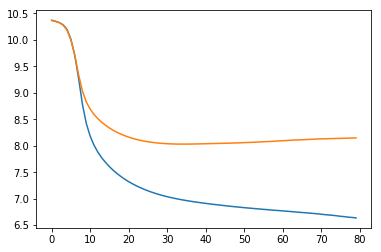

In [65]:
plot_loss(log_path_cleaning, 90)

In [73]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/pre_em_cleaning0206_36.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

INFO:logger:Data directory: ../../data/em_dial/splitted/cleaning
INFO:logger:Vocaburary file: ../../data/twitter_dial/vocab/spvocab.model
INFO:logger:Model: ../../emotion_dialogue_model/model/pre_em_cleaning0206_36.mdl
INFO:logger:Use emotion: True
INFO:logger:SOS_id: 1
INFO:logger:UNK_id: 3
INFO:logger:len_alpha: 0.6
INFO:logger:beam_width: 5
INFO:logger:learning_rate: 1e-06
INFO:logger:EOS_id: 2
INFO:logger:decoder_learning_ratio: 5.0
INFO:logger:dropout: 0.1
INFO:logger:num_layers: 2
INFO:logger:inf_last: False
INFO:logger:eos_gamma: 0.05
INFO:logger:batch_size: 1
INFO:logger:PAD_id: 0
INFO:logger:use_emotion: True
INFO:logger:max_epoch: 80
INFO:logger:decay_step: 600000
INFO:logger:suppress_lambda: 1.0
INFO:logger:lr_decay: 0.5773502691896258
INFO:logger:MAX_UTTR_LEN: 100
INFO:logger:max_gradient: 50.0
INFO:logger:l2_pooling: False
INFO:logger:tfd_lambda: 0.4
INFO:logger:teacher_forcing_ratio: 1.0
INFO:logger:hidden_size: 256
INFO:logger.dataset:Reading files...
INFO:logger.dataset

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 結構あるな。
tgt: 大丈夫だよ。
tgt_emotion: contentment
inf:  NONE
1[5.71]:  
2[-5.31]: ! 
3[-5.63]: 掃除 

inf:  neutral
1[5.72]:  
2[-5.30]: ! 
3[-5.63]: 掃除 

inf:  anger
1[5.72]:  
2[-5.30]: ! 
3[-5.62]: 掃除 

inf:  sad
1[5.72]:  
2[-5.30]: ! 
3[-5.62]: 掃除 

inf:  happy
1[5.71]:  
2[-5.31]: ! 
3[-5.63]: 掃除 

inf:  contentment
1[5.72]:  
2[-5.30]: ! 
3[-5.62]: 掃除 

Dial 2:
src: 過ごしやすいかどうかは僕が決めるよ。僕は掃除しない方が過ごしやすいよ。それよりも休みたいんだ。疲れきっているのに、これ以上仕事が増えたら、過労死しそうだ...
tgt: それはただの甘えです。掃除だけでなく、そうやって全てのことを先のばしにするから、要領が悪く仕事も増えて疲れて何も出来なくなるんです。だらしない生活をしているせいで、昨日も彼女との待ち合わせに遅刻したじゃありませんか。
tgt_emotion: NONE
inf:  NONE
1[5.50]:  
2[-5.46]: ! 
3[-5.78]: 掃除 

inf:  neutral
1[5.51]:  
2[-5.45]: ! 
3[-5.77]: 掃除 

inf:  anger
1[5.52]:  
2[-5.45]: ! 
3[-5.77]: 掃除 

inf:  sad
1[5.51]:  
2[-5.45]: ! 
3[-5.77]: 掃除 

inf:  happy
1[5.51]:  
2[-5.46]: ! 
3[-5.78]: 掃除 

inf:  contentment
1[5.52]:  
2[-5.44]: ! 
3[-5.76]: 掃除 

Dial

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fed96b28208>>
Traceback (most recent call last):
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/queues.py", line 337, in get
    return ForkingPickler.loads(res)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/resource_sharer.py", line 58, in detach
    return r

### 学習はうまく行っていそうなのに、１単語しか発話しないしやっぱり厳しい

# ☆　twitter dataset -> cleaning domain

Data directory: ../data/em_dial/splitted/cleaning

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0206_tw5_clean

Use emotion: True

Checkpoint path: ./model/pre_twitter_0128_5.mdl

Pretrained: True

Fix embedding: False

num_layers: 2

MAX_UTTR_LEN: 100

inf_last: False

UNK_id: 3

l2_pooling: False

tfd_lambda: 0.4

batch_size: 16

teacher_forcing_ratio: 1.0

PAD_id: 0

max_epoch: 100

max_gradient: 50.0

hidden_size: 256

decoder_learning_ratio: 5.0

Minimize validation loss(5.939) : 67 Epoch 


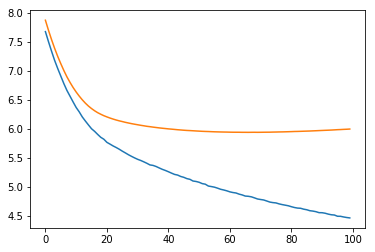

In [24]:
plot_loss(log_path_tw5_cl, 300)

In [83]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0206_tw5_clean_60.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 漫画読んででからな。
tgt: 漫画片付けて早くやれ。
tgt_emotion: anger
inf:  NONE
1[-3.45]: では掃除しましょう! 
2[-3.61]: 掃除しましょう! 
3[-3.66]: お掃除しましょう! 

inf:  neutral
1[-3.42]: では掃除しましょう! 
2[-3.58]: 掃除しましょう! 
3[-3.64]: お掃除しましょう! 

inf:  anger
1[-3.39]: では掃除しましょう! 
2[-3.58]: 掃除しましょう! 
3[-3.67]: お掃除しましょう! 

inf:  sad
1[-3.46]: では掃除しましょう! 
2[-3.64]: 掃除しましょう! 
3[-3.70]: お掃除しましょう! 

inf:  happy
1[-3.42]: では掃除しましょう! 
2[-3.62]: 掃除しましょう! 
3[-3.68]: お掃除しましょう! 

inf:  contentment
1[-3.71]: では掃除しましょう! 
2[-3.87]: 掃除しましょう! 
3[-3.90]: お掃除しましょう! 

Dial 2:
src: たぶんね。
tgt: 今日はここだけ、とかおそうじの場所決めてやってみて。
tgt_emotion: neutral
inf:  NONE
1[-2.55]: AさんAさんが仰っていますか!? 
2[-2.65]: AさんAさんが仰っていますか? 
3[-2.73]: AさんAさんが仰っていますか! 

inf:  neutral
1[-2.61]: AさんAさんが仰っていますか!? 
2[-2.70]: AさんAさんが仰っていますか? 
3[-2.76]: AさんAさんが仰っていますか! 

inf:  anger
1[-2.58]: AさんAさんが仰っていますか!? 
2[-2.71]: AさんAさんが仰っていますか? 
3[-2.76]: AさんAさんが仰っていますか! 

inf:  sad
1[-2.62]: AさんAさんが仰っ

Process Process-26:
Process Process-25:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
    r = index_queue.get(timeout=MANAGER_STATUS_CHECK_INTERVAL)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5

RuntimeError: DataLoader worker (pid 11455) exited unexpectedly with exit code 1. Details are lost due to multiprocessing. Rerunning with num_workers=0 may give better error trace.

# ☆　twitter dataset -> all domain

Data directory: ../data/em_dial/splitted/all

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0212_tw98_all

Use emotion: True

Checkpoint path: ./model/pre_twitter_0206_98.mdl

Pretrained: True

Fix embedding: False

MAX_UTTR_LEN: 100

dropout: 0.1

max_gradient: 50.0

decoder_learning_ratio: 5.0

UNK_id: 3

l2_pooling: False

SOS_id: 1

tfd_lambda: 0.4

inf_last: False

batch_size: 16

teacher_forcing_ratio: 1.0

num_layers: 2

decay_step: 600000

Minimize validation loss(5.7456) : 28 Epoch 


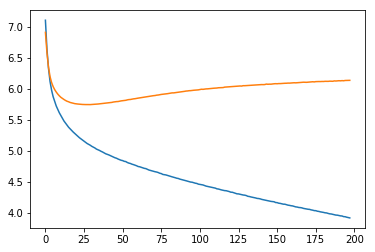

In [19]:
plot_loss(log_path_tw98_all, 200)

In [21]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0212_tw98_all_2.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 丈夫な体だから平気。
tgt: 過信しているといつか本当に体調が悪くなるよ。
tgt_emotion: sad
inf:  NONE
1[-0.00]: それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは 

inf:  neutral
1[-0.00]: それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは 

inf:  NONE
1[-0.00]: それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは 

inf:  neutral
1[-0.00]: それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは 

inf:  anger
1[-0.00]: それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは それは そ

inf:  sad
1[0.00]: それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ 

inf:  happy
1[0.00]: それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ 

inf:  contentment
1[0.00]: それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ それ 

Dial 9:
src: もう怒ってるじゃん。
tgt

In [113]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/pre_tw5_fi_all0206_60.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 散らかってないから掃除しなくて大丈夫。
tgt: 私の測定によると散らかっています。
tgt_emotion: NONE
inf:  NONE
1[-3.03]: では掃除しましょう! 
2[-3.84]: では掃除しましょう。 
3[-4.04]: では掃除しましょう? 

inf:  neutral
1[-3.17]: では掃除しましょう! 
2[-3.42]: では掃除しようよ! 
3[-4.09]: では掃除しましょう。 

inf:  anger
1[-2.96]: では掃除しましょう! 
2[-3.99]: では掃除しましょう。 
3[-4.08]: では掃除しましょう!? 

inf:  sad
1[-3.13]: では掃除しましょう! 
2[-3.86]: では掃除しましょう。 
3[-4.07]: では掃除しましょう? 

inf:  happy
1[-3.15]: では掃除しましょう! 
2[-3.41]: では掃除しようよ! 
3[-4.10]: では掃除しましょう。 

inf:  contentment
1[-3.15]: では掃除しましょう! 
2[-3.80]: では掃除しましょう。 
3[-4.09]: では掃除しましょう? 

Dial 2:
src: 気分が乗らないんだ。
tgt: この先も気分が乗ってくる保証はありませんよ。
tgt_emotion: sad
inf:  NONE
1[-3.25]: Aさんの健康が心配です。 
2[-4.00]: Aさんは健康ではありません! 
3[-4.36]: Aさんは健康ではありません。 

inf:  neutral
1[-3.26]: Aさんの健康が心配です。 
2[-4.03]: Aさんは健康ではありません! 
3[-4.41]: Aさんは健康ではありません。 

inf:  anger
1[-1.64]: Aさんの気持ちが適度が崩れてしまうのです。 
2[-1.81]: Aさんの気持ちが適度が崩れてしまうのです! 
3[-1.85]: Aさんの気持ちが適度が崩れてしまうのです

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f0752a812e8>>
Traceback (most recent call last):
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/queues.py", line 337, in get
    return ForkingPickler.loads(res)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/resource_sharer.py", line 58, in detach
    return r

Data directory: ../data/em_dial/splitted/all

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0210_tw83_all

Use emotion: True

Checkpoint path: ./model/pre_twitter_0206_83.mdl

Pretrained: True

Fix embedding: False

PAD_id: 0

decoder_learning_ratio: 5.0

num_layers: 2

max_gradient: 50.0

tfd_lambda: 0.4

l2_pooling: False

teacher_forcing_ratio: 1.0

dropout: 0.1

max_epoch: 200

learning_rate: 1e-06

batch_size: 16

inf_last: False

hidden_size: 256

Minimize validation loss(5.7606) : 21 Epoch 


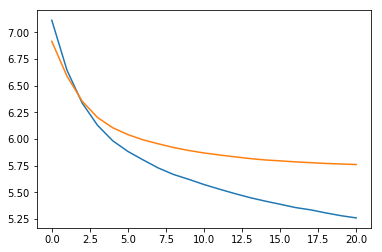

In [51]:
plot_loss(log_path_tw83_all, 300)

In [53]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0210_tw83_all_22.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

INFO:logger:Data directory: ../../data/em_dial/splitted/cleaning
INFO:logger:Vocaburary file: ../../data/twitter_dial/vocab/spvocab.model
INFO:logger:Model: ../../emotion_dialogue_model/model/0210_tw83_all_22.mdl
INFO:logger:Use emotion: True
INFO:logger:max_epoch: 200
INFO:logger:SOS_id: 1
INFO:logger:UNK_id: 3
INFO:logger:len_alpha: 0.6
INFO:logger:beam_width: 5
INFO:logger:learning_rate: 1e-06
INFO:logger:EOS_id: 2
INFO:logger:decoder_learning_ratio: 5.0
INFO:logger:dropout: 0.1
INFO:logger:num_layers: 2
INFO:logger:inf_last: False
INFO:logger:eos_gamma: 0.05
INFO:logger:batch_size: 1
INFO:logger:MAX_UTTR_LEN: 100
INFO:logger:use_emotion: True
INFO:logger:PAD_id: 0
INFO:logger:decay_step: 600000
INFO:logger:suppress_lambda: 1.0
INFO:logger:lr_decay: 0.5773502691896258
INFO:logger:max_gradient: 50.0
INFO:logger:l2_pooling: False
INFO:logger:tfd_lambda: 0.4
INFO:logger:teacher_forcing_ratio: 1.0
INFO:logger:hidden_size: 256
INFO:logger.dataset:Reading files...
INFO:logger.dataset:Read

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 自分のことだからロボットには関係ない。
tgt: 手伝うから掃除してよ。
tgt_emotion: sad
inf:  NONE
1[-3.37]: Aさんが健康になれませんか? 
2[-3.52]: Aさんが健康になれましたか? 
3[-3.64]: Aさんが健康になれませんか。 

inf:  neutral
1[-3.39]: Aさんが健康になれませんか? 
2[-3.52]: Aさんが健康になれましたか? 
3[-3.67]: Aさんが健康になれませんか。 

inf:  anger
1[-3.38]: Aさんが健康になれませんか? 
2[-3.64]: Aさんが健康になれませんか。 
3[-3.75]: Aさんが健康になれませんか! 

inf:  sad
1[-3.45]: Aさんが健康になれませんか? 
2[-3.54]: Aさんが健康になれましたか? 
3[-3.77]: Aさんが健康になれますよ? 

inf:  happy
1[-3.29]: Aさんが健康になれませんか? 
2[-3.57]: Aさんが健康になれませんか。 
3[-3.63]: Aさんが健康になるよ。 

inf:  contentment
1[-3.28]: Aさんが健康になれませんか? 
2[-3.41]: Aさんが健康になれましたか? 
3[-3.58]: Aさんが健康になれませんか。 

Dial 2:
src: ちょっとじゃん。
tgt: もう塵が積もって山となってます。
tgt_emotion: neutral
inf:  NONE
1[-0.16]: Aさん!!!!!!?!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 
2[-0.16]: Aさん!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

inf:  NONE
1[-0.18]: Aさん!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 
2[-0.26]: Aさん!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 
3[-0.26]: Aさん!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 

inf:  neutral
1[-0.65]: Aさん!!!!!!!!!!!!!!!!!!! 
2[-0.66]: Aさん!!!!!!!!!!!!!!!!!! 
3[-0.69]: Aさん!!!!!!!!!!!!!!!!! 

inf:  anger
1[-0.14]: Aさん!!!!!?!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 
2[-0.14]: Aさん!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 
3[-0.29]: Aさん!!!!!?!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 

inf:  sad
1[-0.71]: Aさん!!!!!!!!!!!!!!!!! 
2[-0.72]: Aさん!!!!!!!!!!!!!!!! 
3[-0.75]: Aさん!!!!!!!!!!!!!!! 

inf:  happy
1[-0.17]: Aさん!!!!!?!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# ☆　twitter dataset(former) -> all domain -> cleaning

Data directory: ../data/em_dial/splitted/cleaning

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0208_tw5_all10_clean

Use emotion: True

Checkpoint path: ./model/pre_tw5_fi_all0206_10.mdl

Pretrained: True

Fix embedding: False

decay_step: 600000

EOS_id: 2

num_layers: 2

MAX_UTTR_LEN: 100

learning_rate: 1e-07

SOS_id: 1

teacher_forcing_ratio: 1.0

hidden_size: 256

Minimize validation loss(5.8339) : 313 Epoch 
Minimize validation loss(5.8339) : 314 Epoch 
Minimize validation loss(5.8339) : 315 Epoch 
Minimize validation loss(5.8339) : 316 Epoch 
Minimize validation loss(5.8339) : 317 Epoch 
Minimize validation loss(5.8339) : 318 Epoch 
Minimize validation loss(5.8339) : 319 Epoch 
Minimize validation loss(5.8339) : 320 Epoch 
Minimize validation loss(5.8339) : 321 Epoch 


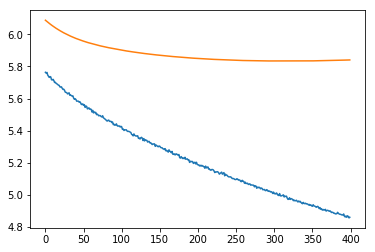

In [149]:
plot_loss(log_path_tw5_all10_cl, 400)

In [151]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0208_tw5_all10_clean_320.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

INFO:logger:Data directory: ../../data/em_dial/splitted/cleaning
INFO:logger:Vocaburary file: ../../data/twitter_dial/vocab/spvocab.model
INFO:logger:Model: ../../emotion_dialogue_model/model/0208_tw5_all10_clean_320.mdl
INFO:logger:Use emotion: True
INFO:logger:MAX_UTTR_LEN: 100
INFO:logger:PAD_id: 0
INFO:logger:learning_rate: 1e-07
INFO:logger:max_gradient: 50.0
INFO:logger:dropout: 0.1
INFO:logger:num_layers: 2
INFO:logger:decay_step: 600000
INFO:logger:tfd_lambda: 0.4
INFO:logger:len_alpha: 0.6
INFO:logger:suppress_lambda: 1.0
INFO:logger:teacher_forcing_ratio: 1.0
INFO:logger:SOS_id: 1
INFO:logger:hidden_size: 256
INFO:logger:decoder_learning_ratio: 5.0
INFO:logger:lr_decay: 0.5773502691896258
INFO:logger:eos_gamma: 0.05
INFO:logger:l2_pooling: False
INFO:logger:max_epoch: 400
INFO:logger:EOS_id: 2
INFO:logger:beam_width: 5
INFO:logger:use_emotion: True
INFO:logger:batch_size: 1
INFO:logger:inf_last: False
INFO:logger:UNK_id: 3
INFO:logger.dataset:Reading files...
INFO:logger.data

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 怒ればいいじゃん。
tgt: 掃除しないともう話をしない。
tgt_emotion: anger
inf:  NONE
1[-3.15]: どうして怒るのですか? 
2[-3.22]: どうして怒るんだよ! 
3[-3.54]: どうして怒るんだ! 

inf:  neutral
1[-3.15]: どうして怒るのですか? 
2[-3.19]: どうして怒るんだよ! 
3[-3.52]: どうして怒るんだ! 

inf:  anger
1[-3.17]: どうして怒るんだよ! 
2[-3.17]: どうして怒るのですか? 
3[-3.50]: どうして怒るんだ! 

inf:  sad
1[-3.20]: どうして怒るのですか? 
2[-3.24]: どうして怒るんだよ! 
3[-3.59]: どうして怒るんだ! 

inf:  happy
1[-3.14]: どうして怒るのですか? 
2[-3.17]: どうして怒るんだよ! 
3[-3.50]: どうして怒るんだ! 

inf:  contentment
1[-3.17]: どうして怒るのですか? 
2[-3.27]: どうして怒るんだよ! 
3[-3.58]: どうして怒るんだ! 

Dial 2:
src: そーだね。
tgt: お部屋きれいにしたらスムーズにお出かけできるよね。
tgt_emotion: NONE
inf:  NONE
1[-4.07]: Aさんのために頑張りましょう。 
2[-4.43]: Aさんにとって大切な!? 
3[-4.66]: Aさんにとって大切な! 

inf:  neutral
1[-2.61]: Aさんのために一緒に掃除しましょう! 
2[-2.81]: Aさんのために一緒に掃除しましょう!? 
3[-3.18]: Aさんのために一緒に掃除しましょう? 

inf:  anger
1[-2.59]: Aさんのために一緒に掃除しましょう! 
2[-2.78]: Aさんのために一緒に掃除しましょう!? 
3[-3.19]: Aさんのために一緒に掃除しましょう? 

inf

Data directory: ../data/em_dial/splitted/cleaning

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0206_tw5_all40_clean

Use emotion: True

Checkpoint path: ./model/pre_tw5_fi_all0206_40.mdl

Pretrained: True

Fix embedding: False

PAD_id: 0

l2_pooling: False

num_layers: 2

learning_rate: 1e-06

teacher_forcing_ratio: 1.0

dropout: 0.1

tfd_lambda: 0.4

UNK_id: 3

Minimize validation loss(5.7679) : 14 Epoch 


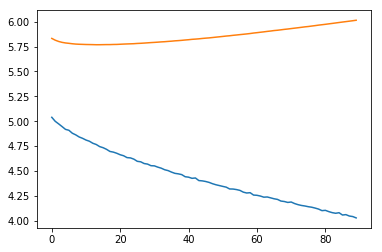

In [118]:
plot_loss(log_path_cleaning, 90)

Data directory: ../data/em_dial/splitted/cleaning

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0206_tw5_all34_clean

Use emotion: True

Checkpoint path: ./model/pre_tw5_fi_all0206_34.mdl

Pretrained: True

Fix embedding: False

SOS_id: 1

decay_step: 600000

PAD_id: 0

EOS_id: 2

MAX_UTTR_LEN: 100

tfd_lambda: 0.4

batch_size: 16

learning_rate: 1e-07

Minimize validation loss(5.7615) : 90 Epoch 


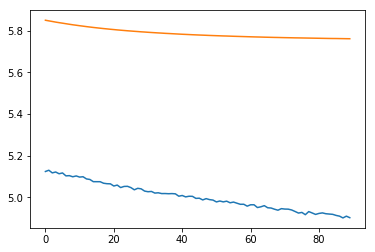

In [110]:
plot_loss(log_path_tw5_all34_cl, 300)

In [112]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0206_tw5_all34_clean_90.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 本当に掃除が嫌いなんだ。
tgt: こんなに部屋が汚いと友達も来てくれなくなるよ。
tgt_emotion: NONE
inf:  NONE
1[-3.74]: 掃除をしましょう! 
2[-3.95]: 掃除をしてくれますか。 
3[-4.11]: 掃除をしましょう。 

inf:  neutral
1[-3.70]: 掃除をしましょう! 
2[-4.03]: 掃除をしてくれますか。 
3[-4.14]: 掃除をしましょう。 

inf:  anger
1[-3.62]: 掃除をしましょう! 
2[-4.06]: 掃除をしてくれますか。 
3[-4.18]: 掃除をしましょう。 

inf:  sad
1[-3.83]: 掃除をしましょう! 
2[-3.93]: 掃除をしてくれますか。 
3[-4.13]: 掃除をしましょう。 

inf:  happy
1[-3.64]: 掃除をしましょう! 
2[-4.03]: 掃除をしてくれますか。 
3[-4.12]: 掃除をしましょう。 

inf:  contentment
1[-3.86]: 掃除をしましょう! 
2[-3.97]: 掃除をしてくれますか。 
3[-4.10]: 掃除をしましょう。 

Dial 2:
src: 風邪かもしれないよ。
tgt: 現実から目を背けていたら駄目だよ。
tgt_emotion: anger
inf:  NONE
1[-3.70]: 風邪ひきましょう。 
2[-3.80]: 風邪ひきませんか? 
3[-4.01]: 風邪ひきませんか。 

inf:  neutral
1[-3.69]: 風邪ひきましょう。 
2[-3.80]: 風邪ひきませんか? 
3[-4.02]: 風邪ひきましょう 

inf:  anger
1[-3.70]: 風邪ひきましょう。 
2[-3.79]: 風邪ひきませんか? 
3[-4.01]: 風邪ひきませんか! 

inf:  sad
1[-3.67]: 風邪ひきましょう。 
2[-3.86]: 風邪ひきませんか? 
3[-4.03]: 風邪ひきませ

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f0748bcb7f0>>
Traceback (most recent call last):
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/queues.py", line 337, in get
    return ForkingPickler.loads(res)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/resource_sharer.py", line 57, in detach
    with _re

# ☆　twitter dataset(former) -> all domain -> cleaning

In [ ]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0206_tw5_all34_clean_90.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

# ☆　OpenSubtitles 

Data directory: ../data/op_sub_dial/splitted

Vocaburary file: ../data/em_dial/vocab/spvocab.model

Model prefix: ./model/0212_op

Use emotion: False

Checkpoint path: None

Pretrained: False

Fix embedding: False

UNK_id: 3

decoder_learning_ratio: 5.0

learning_rate: 0.0001

teacher_forcing_ratio: 1.0

decay_step: 600000

num_layers: 2

tfd_lambda: 0.4

EOS_id: 2

lr_decay: 0.5773502691896258

SOS_id: 1

batch_size: 256

MAX_UTTR_LEN: 100

PAD_id: 0

Minimize validation loss(5.1113) : 8 Epoch 


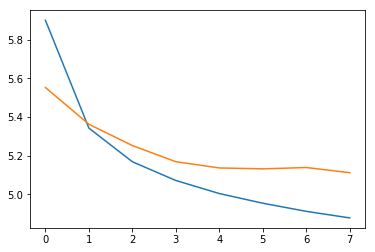

In [12]:
plot_loss(log_path_op,25)

# ☆　OpenSubtitles -> cleaning

Data directory: ../data/op_sub_dial/splitted

Vocaburary file: ../data/em_dial/vocab/spvocab.model

Model prefix: ./model/pre_op_0128

Use emotion: False

Checkpoint path: None

Pretrained: False

Fix embedding: False

decay_step: 600000

learning_rate: 0.0001

decoder_learning_ratio: 5.0

PAD_id: 0

num_layers: 2

dropout: 0.1

batch_size: 64

hidden_size: 256

Minimize validation loss(4.9577) : 13 Epoch 


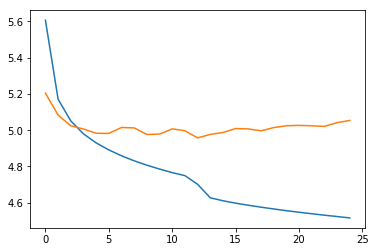

In [19]:
plot_loss(log_path_op,25)

In [16]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/pre_op13_fi_em_0128_2.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/em_dial/vocab/spvocab.model \
                    --use_emotion

INFO:logger:Data directory: ../../data/em_dial/splitted/cleaning
INFO:logger:Vocaburary file: ../../data/em_dial/vocab/spvocab.model
INFO:logger:Model: ../../emotion_dialogue_model/model/pre_op13_fi_em_0128_2.mdl
INFO:logger:Use emotion: True
INFO:logger:SOS_id: 1
INFO:logger:UNK_id: 3
INFO:logger:len_alpha: 0.6
INFO:logger:beam_width: 5
INFO:logger:learning_rate: 0.0001
INFO:logger:EOS_id: 2
INFO:logger:decoder_learning_ratio: 5.0
INFO:logger:decay_step: 600000
INFO:logger:num_layers: 2
INFO:logger:inf_last: False
INFO:logger:eos_gamma: 0.05
INFO:logger:tfd_lambda: 0.4
INFO:logger:batch_size: 1
INFO:logger:PAD_id: 0
INFO:logger:use_emotion: True
INFO:logger:max_epoch: 50
INFO:logger:suppress_lambda: 1.0
INFO:logger:lr_decay: 0.5773502691896258
INFO:logger:MAX_UTTR_LEN: 100
INFO:logger:max_gradient: 50.0
INFO:logger:l2_pooling: False
INFO:logger:dropout: 0.1
INFO:logger:teacher_forcing_ratio: 1.0
INFO:logger:hidden_size: 256
INFO:logger.dataset:Reading files...
INFO:logger.dataset:Read

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 気分が乗らないんだ。
tgt: この先も気分が乗ってくる保証はありませんよ。
tgt_emotion: sad
inf:  NONE
1[-0.48]: 部屋が汚いまま部屋が汚いままになったら、掃除しろよ。 
2[-0.58]: 部屋が汚いまま部屋が汚いままになったら、掃除しろ。 
3[-0.80]: 部屋が汚いまま部屋が汚れていますよ。 

inf:  neutral
1[-0.48]: 部屋が汚いまま部屋が汚いままになったら、掃除しろよ。 
2[-0.58]: 部屋が汚いまま部屋が汚いままになったら、掃除しろ。 
3[-0.79]: 部屋が汚いまま部屋が汚れていますよ。 

inf:  anger
1[-0.48]: 部屋が汚いまま部屋が汚いままになったら、掃除しろよ。 
2[-0.58]: 部屋が汚いまま部屋が汚いままになったら、掃除しろ。 
3[-0.79]: 部屋が汚いまま部屋が汚れていますよ。 

inf:  sad
1[-0.48]: 部屋が汚いまま部屋が汚いままになったら、掃除しろよ。 
2[-0.59]: 部屋が汚いまま部屋が汚いままになったら、掃除しろ。 
3[-0.80]: 部屋が汚いまま部屋が汚れていますよ。 

inf:  happy
1[-0.46]: 部屋が汚いまま部屋が汚いまま部屋が汚れています。 
2[-0.49]: 部屋が汚いまま部屋が汚いまま部屋が汚れていますよ。 
3[-0.80]: 部屋が汚いまま部屋が汚れていますよ。 

inf:  contentment
1[-0.47]: 部屋が汚いまま部屋が汚いままになったら、掃除しろよ。 
2[-0.57]: 部屋が汚いまま部屋が汚いままになったら、掃除しろ。 
3[-0.80]: 部屋が汚いまま部屋が汚れていますよ。 

Dial 2:
src: もうある程度の場所は覚えたよ。
tgt: これだけ物が散乱していると掃除機をかけることも出来ないじゃない。
tgt_emotion: anger
inf:  NONE
1[-0.95]: 部屋が汚いまま部屋が汚れています。 
2[

Data directory: ../data/em_dial/splitted/all

Vocaburary file: ../data/em_dial/vocab/spvocab.model

Model prefix: ./model/0208_op13_all

Use emotion: True

Checkpoint path: ./model/pre_op_0128_13.mdl

Pretrained: True

Fix embedding: False

dropout: 0.1

tfd_lambda: 0.4

lr_decay: 0.5773502691896258

num_layers: 2

SOS_id: 1

max_gradient: 50.0

max_epoch: 400

teacher_forcing_ratio: 1.0

decay_step: 600000

decoder_learning_ratio: 5.0

l2_pooling: False

hidden_size: 256

batch_size: 16

Minimize validation loss(4.3501) : 206 Epoch 
Minimize validation loss(4.3501) : 207 Epoch 


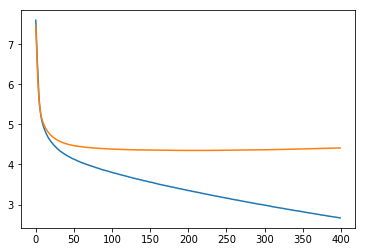

In [75]:
plot_loss(log_path_op13_all,400)

In [3]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0208_op13_all_2.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/em_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 僕はアレルギーもないし、大丈夫だよ。
tgt: でも放っておくとダニや害虫も増えますよ。
tgt_emotion: sad
inf:  NONE
1[-0.26]: じゃぁぁぁぁぁぁぁ、ぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁ 

inf:  neutral
1[-0.24]: じゃぁぁぁぁぁぁ、ぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁ 

inf:  anger
1[-0.26]: じゃぁぁぁぁぁぁぁ、ぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁ 

inf:  sad
1[-0.24]: じゃぁぁぁぁぁぁぁ、ぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁ 

inf:  happy
1[-0.26]: じゃぁぁぁぁぁぁぁ、ぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁ 

inf:  contentment
1[-0.26]: じゃぁぁぁぁぁぁぁ、ぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁ 

Dial 2:
src: おーい。
tgt: ...。
tgt_emotion: NONE
inf:  NONE
1[-3.18]: おはようご

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f342002fa20>>
Traceback (most recent call last):
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/queues.py", line 337, in get
    return ForkingPickler.loads(res)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/resource_sharer.py", line 57, in detach
    with _re

In [1]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0208_op13_all_100.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/em_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 面倒くさいから嫌だよ。
tgt: こんなにホコリが積もっている部屋で寝るのは健康にも良くないですよ。
tgt_emotion: sad
inf:  NONE
1[-0.09]: わかりました。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。 

inf:  neutral
1[-0.10]: わかりました。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。 

inf:  anger
1[-0.09]: わかりました。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。 

inf:  sad
1[-0.09]: わかりました。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。 

inf:  happy
1[-0.09]: わかりました。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。 

inf:  contentment
1[-0.10]: わかりました。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。 

Dial 2:
src: わかった。
tgt: じゃあ僕応援するね。
tgt_emo